In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("data.csv")

In [4]:
df.head()

,USERS,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,Unnamed: 36
0,1,A1,A1,A1,A1,A2,A3,A1,A4,A5,...,A13,A14,A15,A15,A2,A3,A3,A2,A3,NaN
1,2,A16,A2,A3,A17,A3,A18,A19,A18,A20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,A26,A27,A18,A28,A18,A14,A18,A16,A29,...,A18,A3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,A32,A32,A33,A34,A35,A36,A37,A36,A18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,A25,A5,A2,A3,A3,A24,A25,A32,A32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.set_index(df.columns[0],inplace=True)

In [6]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,Unnamed: 36
USERS,,,,,,,,,,,,,,,,,,,,,
1,A1,A1,A1,A1,A2,A3,A1,A4,A5,A2,...,A13,A14,A15,A15,A2,A3,A3,A2,A3,NaN
2,A16,A2,A3,A17,A3,A18,A19,A18,A20,A21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A26,A27,A18,A28,A18,A14,A18,A16,A29,A16,...,A18,A3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A32,A32,A33,A34,A35,A36,A37,A36,A18,A3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,A25,A5,A2,A3,A3,A24,A25,A32,A32,A10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data=[]
for i in range(59):
    x=df.values[i]
    x=x[~pd.isnull(x)]
    data.append(x)
data

[array(['A1', 'A1', 'A1', 'A1', 'A2', 'A3', 'A1', 'A4', 'A5', 'A2', 'A3',
        'A3', 'A2', 'A3', 'A3', 'A6', 'A7', 'A8', 'A9', 'A5', 'A10', 'A2',
        'A3', 'A11', 'A12', 'A2', 'A13', 'A14', 'A15', 'A15', 'A2', 'A3',
        'A3', 'A2', 'A3'], dtype=object),
 array(['A16', 'A2', 'A3', 'A17', 'A3', 'A18', 'A19', 'A18', 'A20', 'A21',
        'A3', 'A21', 'A3', 'A22', 'A16', 'A23', 'A16', 'A3', 'A24', 'A25',
        'A6', 'A6', 'A3'], dtype=object),
 array(['A26', 'A27', 'A18', 'A28', 'A18', 'A14', 'A18', 'A16', 'A29',
        'A16', 'A18', 'A21', 'A30', 'A21', 'A14', 'A27', 'A31', 'A18',
        'A3', 'A18', 'A3', 'A25', 'A14', 'A14', 'A18', 'A14', 'A18', 'A3'],
       dtype=object),
 array(['A32', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A36', 'A18',
        'A3'], dtype=object),
 array(['A25', 'A5', 'A2', 'A3', 'A3', 'A24', 'A25', 'A32', 'A32', 'A10',
        'A5', 'A2', 'A25', 'A3'], dtype=object),
 array(['A20', 'A21', 'A3', 'A38', 'A21', 'A3'], dtype=object),
 array(['A5', '

In [8]:
from markovclick.models import MarkovClickstream
m = MarkovClickstream(data)

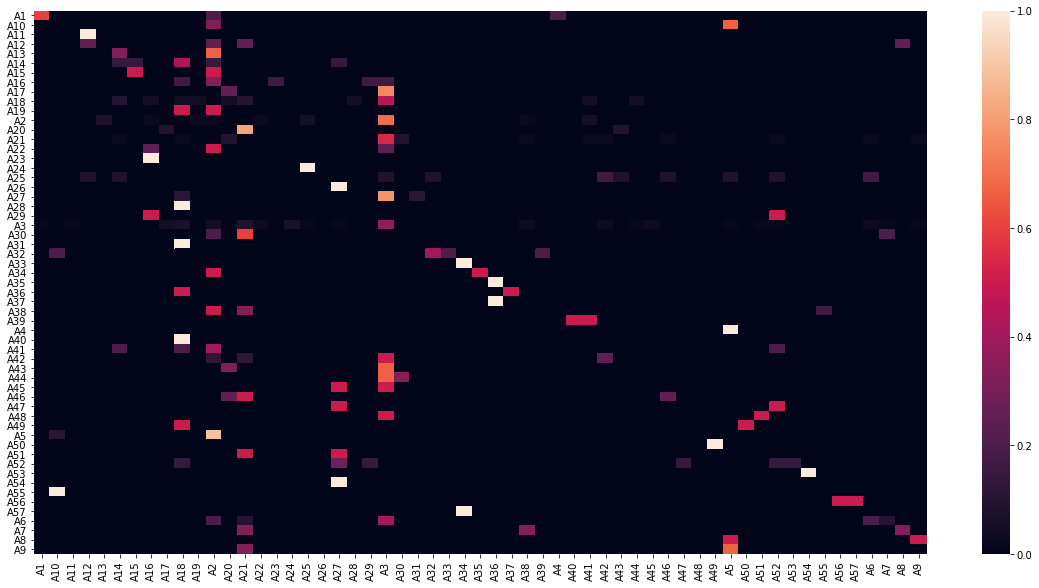

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(m.prob_matrix, xticklabels=m.pages, yticklabels=m.pages)

In [10]:
from markovclick.viz import visualise_markov_chain
graph = visualise_markov_chain(m)

In [11]:
print(graph.source)

digraph {
	A1 [label=A1 fillcolor="#76ff03" fontcolor="#1a237e" fontname=Helvetica penwidth=0 style=filled]
	A1 -> A1 [label=0.60 arrowsize=0.75 color="#90caf9" fontname=Helvetica penwidth=1.5]
	A1 -> A4 [label="   0.20" arrowsize=0.5 color="#90caf9" fontname=Helvetica fontsize=10 penwidth=0.75]
	A10 [label=A10 fillcolor="#76ff03" fontcolor="#1a237e" fontname=Helvetica penwidth=0 style=filled]
	A10 -> A5 [label=0.67 arrowsize=0.75 color="#90caf9" fontname=Helvetica penwidth=1.5]
	A10 -> A2 [label="   0.33" arrowsize=0.5 color="#90caf9" fontname=Helvetica fontsize=10 penwidth=0.75]
	A10 -> A10 [label="   0.00" arrowsize=0.5 color="#cfd8dc" fontname=Helvetica fontsize=10 penwidth=1.8]
	A11 [label=A11 fillcolor="#76ff03" fontcolor="#1a237e" fontname=Helvetica penwidth=0 style=filled]
	A11 -> A12 [label=1.00 arrowsize=0.75 color="#90caf9" fontname=Helvetica penwidth=1.5]
	A11 -> A9 [label="   0.00" arrowsize=0.5 color="#90caf9" fontname=Helvetica fontsize=10 penwidth=0.75]
	A11 -> A11 [lab

In [12]:
graph.render('test-output/round-tabl.gv', view=True)

'test-output\\round-tabl.gv.pdf'

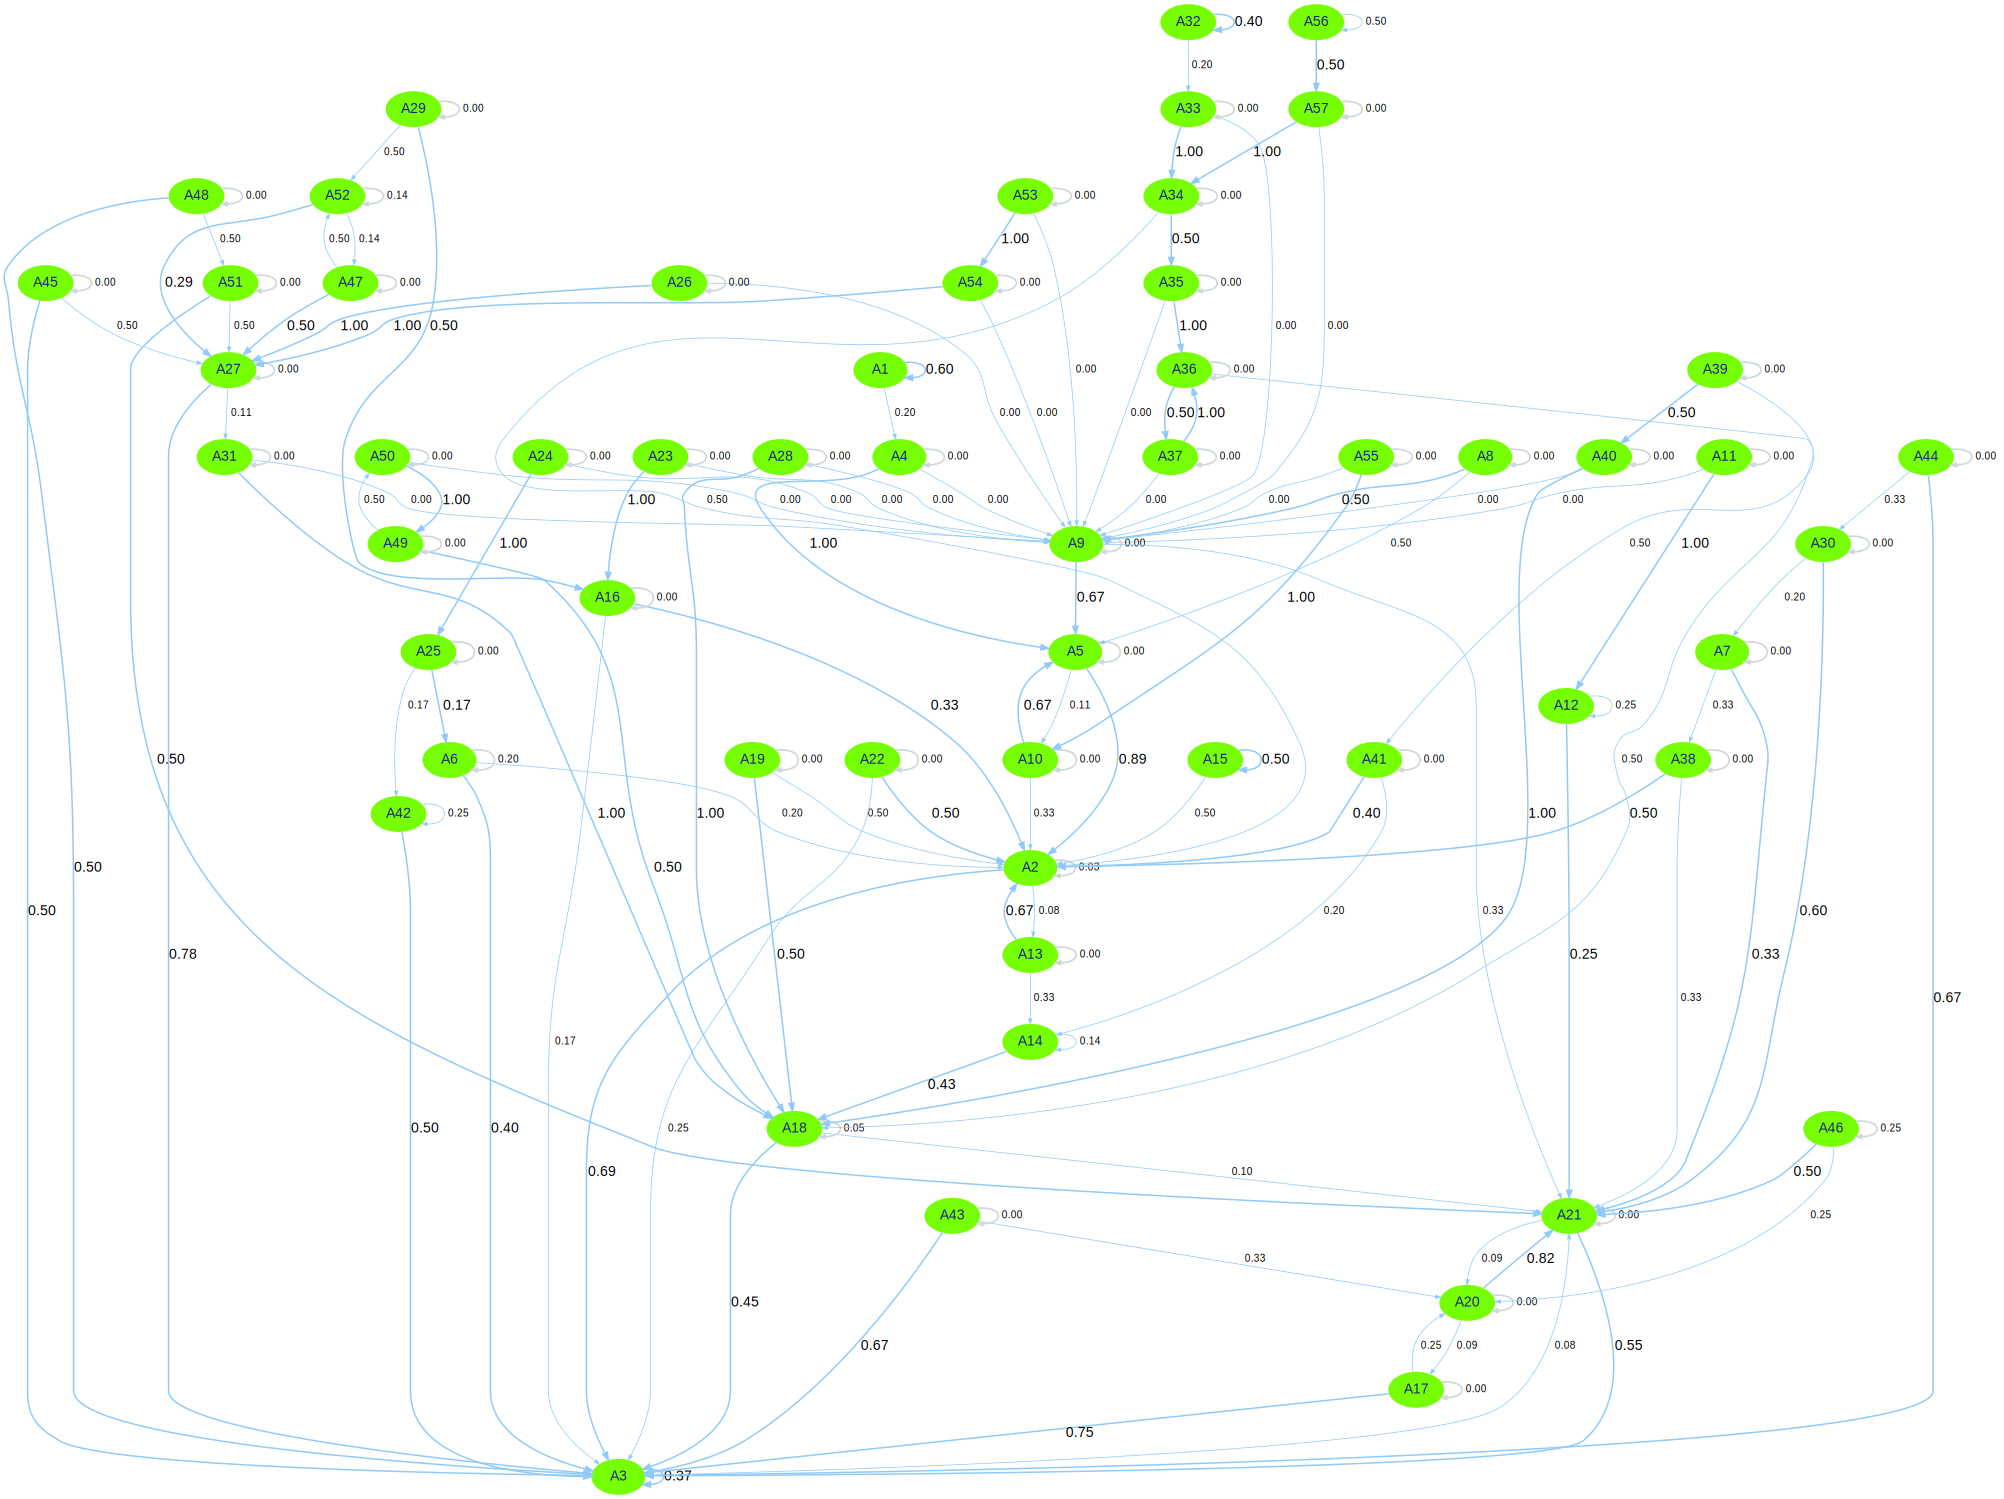

In [13]:
graph